# Results of 1470 to 1869 simulation with fire bug fix

In [1]:
import sys
sys.path.append('/home/adamhb/gdrive/FATES/Earth-System-Model-Tools')
import os
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
from datetime import datetime#,timedelta
import esm_tools
from matplotlib import pyplot as plt
import seaborn as sns
import xarray as xr
pd.set_option('display.max_rows', 500)
from fields import fields
import importlib
importlib.reload(esm_tools)

<module 'esm_tools' from '/home/adamhb/gdrive/FATES/Earth-System-Model-Tools/esm_tools.py'>

In [34]:
output_root = '/home/adamhb/gdrive/postdoc/simulation_output'
m2_per_ha = 1e4

## Bug fix helps size class distribution in 1869

Size class distributions with the bug fix are very close to observations shown in Figs. 16,17 (p. 103) in Safford and Stevens, 2017

In [3]:
bug_fix_1869_scls_dist = esm_tools.get_size_class_distribution(case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                      years = list(range(1869,1870)),
                                      model_output_root=output_root)

no_bug_fix_1869_scls_dist = esm_tools.get_size_class_distribution(case_name='CZ2_equilibrium_011824_-17e2acb6a_FATES-5b076b69',
                                      years = list(range(1869,1870)),
                                      model_output_root=output_root,)

bug_fix_1869_scls_dist['Group'] = 'bug_fix'
no_bug_fix_1869_scls_dist['Group'] = 'no_bug_fix'
scls_dist_df = pd.concat([bug_fix_1869_scls_dist,no_bug_fix_1869_scls_dist], axis=0)

bins = [5, 20, 40, 60, 80, 100, 120, float('inf')]
labels = ['5-20', '20-40', '40-60', '60-80', '80-100', '100-120', '>120']

# Create a new column for binned size classes
scls_dist_df['new_size_class'] = pd.cut(scls_dist_df['size_class'], bins=bins, labels=labels, right=False, include_lowest=True)
new_scls_dist_df = scls_dist_df.groupby(['Group','inst_tag','new_size_class']).sum()['density'].reset_index()

-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have be

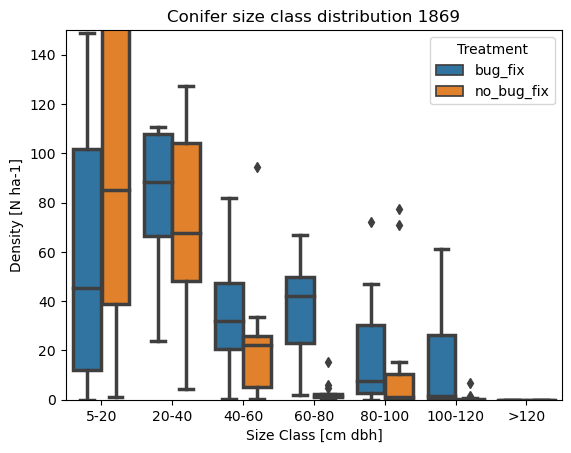

In [4]:
# Assuming 'bug_fix_1869_scls_dist' is your DataFrame and it includes a 'treatment' column
# Adjusting the boxplot to fill boxes with white and borders with black, and grouping by 'treatment'
sns.boxplot(x='new_size_class', y='density', hue='Group', data=new_scls_dist_df, linewidth=2.5)

# Adding titles and labels
plt.title('Conifer size class distribution 1869')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 150)

# Adding a legend if not automatically included
plt.legend(title='Treatment')

# Display the plot
plt.show()

## Effect of bmort on size class distribution

Setting b mort to 0 significantly improved the model's ability to create large trees

In [5]:
list(range(119,129))

[119, 120, 121, 122, 123, 124, 125, 126, 127, 128]

In [6]:
bmort_1869_scls_dist = esm_tools.get_size_class_distribution(case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                      years = list(range(1869,1870)),
                                      model_output_root=output_root,tag_numbers=[2, 8, 14, 15, 22, 24, 25, 26, 30, 33])

no_bmort_1869_scls_dist = esm_tools.get_size_class_distribution(case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                      years = list(range(1869,1870)),
                                      model_output_root=output_root, tag_numbers=list(range(109,119)))

bmort_1869_scls_dist['Group'] = 'bmort'
no_bmort_1869_scls_dist['Group'] = 'no_bmort'
scls_dist_df_bmort_test = pd.concat([bmort_1869_scls_dist,no_bmort_1869_scls_dist], axis=0)

bins = [5, 20, 40, 60, 80, 100, 120, float('inf')]
labels = ['5-20', '20-40', '40-60', '60-80', '80-100', '100-120', '>120']

# Create a new column for binned size classes
scls_dist_df_bmort_test['new_size_class'] = pd.cut(scls_dist_df_bmort_test['size_class'], bins=bins, labels=labels, right=False, include_lowest=True)
scls_dist_df_bmort_test_new_scls = scls_dist_df_bmort_test.groupby(['Group','inst_tag','new_size_class']).sum()['density'].reset_index()
scls_dist_df_bmort_test_new_scls = scls_dist_df_bmort_test_new_scls.loc[scls_dist_df_bmort_test_new_scls['density'] > 0]

-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 


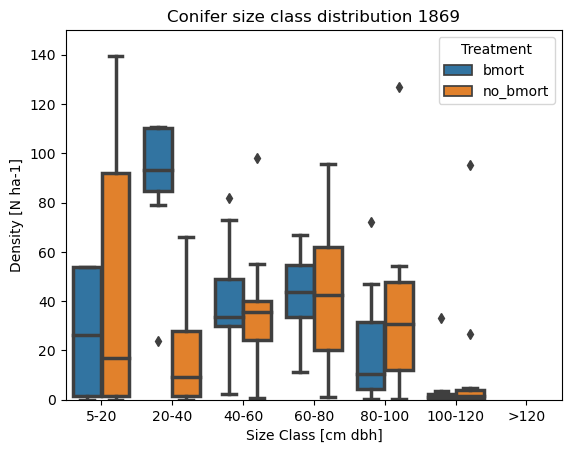

In [7]:
sns.boxplot(x='new_size_class', y='density', hue='Group', data=scls_dist_df_bmort_test_new_scls, linewidth=2.5)

# Adding titles and labels
plt.title('Conifer size class distribution 1869')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 150)

# Adding a legend if not automatically included
plt.legend(title='Treatment')

# Display the plot
plt.show()

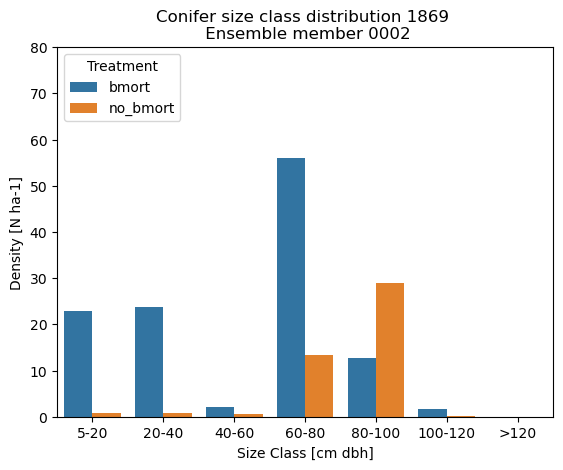

In [8]:
scls_dist_df_bmort_test_new_scls_0002 = scls_dist_df_bmort_test_new_scls.loc[scls_dist_df_bmort_test_new_scls['inst_tag'].isin(['0002','0109'])]
sns.barplot(x='new_size_class', y='density', hue='Group', data=scls_dist_df_bmort_test_new_scls_0002, linewidth=2.5)

# Adding titles and labels
plt.title('Conifer size class distribution 1869 \n Ensemble member 0002')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 80)

# Adding a legend if not automatically included
plt.legend(title='Treatment')

# Display the plot
plt.show()

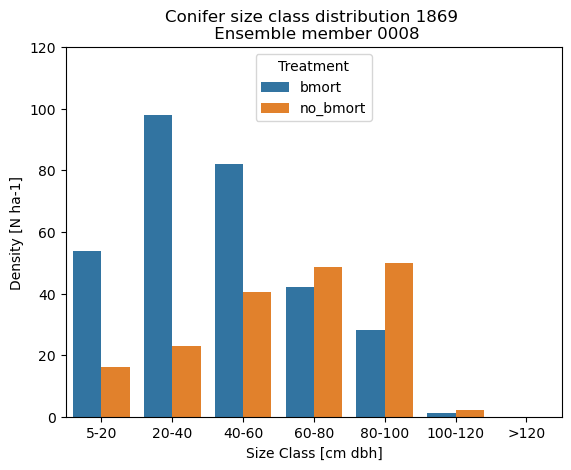

In [9]:
scls_dist_df_bmort_test_new_scls_0008 = scls_dist_df_bmort_test_new_scls.loc[scls_dist_df_bmort_test_new_scls['inst_tag'].isin(['0008','0110'])]
sns.barplot(x='new_size_class', y='density', hue='Group', data=scls_dist_df_bmort_test_new_scls_0008, linewidth=2.5)

# Adding titles and labels
plt.title('Conifer size class distribution 1869 \n Ensemble member 0008')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 120)

# Adding a legend if not automatically included
plt.legend(title='Treatment')

# Display the plot
plt.show()

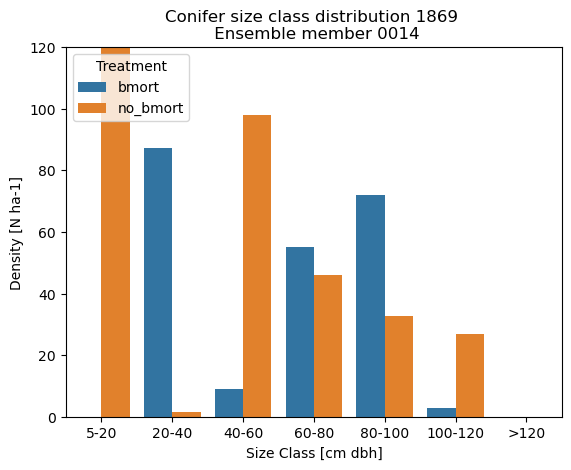

In [10]:
scls_dist_df_bmort_test_new_scls_0008 = scls_dist_df_bmort_test_new_scls.loc[scls_dist_df_bmort_test_new_scls['inst_tag'].isin(['0014','0111'])]
sns.barplot(x='new_size_class', y='density', hue='Group', data=scls_dist_df_bmort_test_new_scls_0008, linewidth=2.5)

# Adding titles and labels
plt.title('Conifer size class distribution 1869 \n Ensemble member 0014')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 120)

# Adding a legend if not automatically included
plt.legend(title='Treatment')

# Display the plot
plt.show()

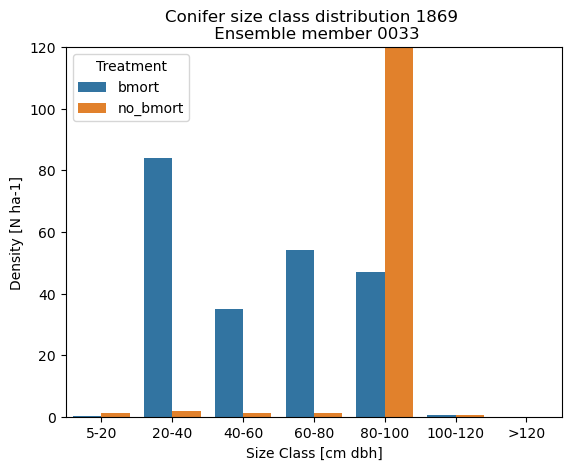

In [11]:
scls_dist_df_bmort_test_new_scls_0008 = scls_dist_df_bmort_test_new_scls.loc[scls_dist_df_bmort_test_new_scls['inst_tag'].isin(['0033','0118'])]
sns.barplot(x='new_size_class', y='density', hue='Group', data=scls_dist_df_bmort_test_new_scls_0008, linewidth=2.5)

# Adding titles and labels
plt.title('Conifer size class distribution 1869 \n Ensemble member 0033')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 120)

# Adding a legend if not automatically included
plt.legend(title='Treatment')

# Display the plot
plt.show()

## Effect of vcmax on GPP, NPP

Could also alter leaf nitrogen per area and leaf lifespan.

We were probably forced to choose parameters that had very high NPP previously because they were the only ones that could produce large trees.

In [12]:
vcmax_control_0002 = esm_tools.load_fates_output_data(model_output_root=output_root,
                                                 case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                                 years = list(range(1869,1870)),
                                                 fields=fields,
                                                 inst_tag='0002')
vcmax_control_0008 = esm_tools.load_fates_output_data(model_output_root=output_root,
                                                 case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                                 years = list(range(1869,1870)),
                                                 fields=fields,
                                                 inst_tag='0008')
vcmax_test_0002 = esm_tools.load_fates_output_data(model_output_root=output_root,
                                                 case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                                 years = list(range(1869,1870)),
                                                 fields=fields,
                                                 inst_tag='0119')
vcmax_test_0008 = esm_tools.load_fates_output_data(model_output_root=output_root,
                                                 case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                                 years = list(range(1869,1870)),
                                                 fields=fields,
                                                 inst_tag='0120')

-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 


In [13]:
def get_gpp_npp_df(ds,group,inst_tag):
    out = {'Group': group,
           'inst_tag':inst_tag,
           'npp':esm_tools.get_total_npp(ds),
           'gpp':esm_tools.get_total_gpp(ds)}
    return pd.DataFrame(out,index=[0])

In [14]:
npp_obs = {'Group':['obs'] * 4, 'inst_tag':[None] * 4, 'npp': [0.636,0.675,0.54,0.42], 'gpp':[1.35,1.4,1.08,None]}
pd.DataFrame(npp_obs)

,Group,inst_tag,npp,gpp
0,obs,None,0.636,1.35
1,obs,None,0.675,1.40
2,obs,None,0.540,1.08
3,obs,None,0.420,NaN


In [15]:
vcmax_test_data_0002 = pd.concat([get_gpp_npp_df(vcmax_control_0002,group = "control",inst_tag = "0002"),
                                  pd.DataFrame(npp_obs),
           #get_gpp_npp_df(vcmax_control_0008,group = "control",inst_tag = "0008"),
           get_gpp_npp_df(vcmax_test_0002,group = "test",inst_tag = "0002")])#,
           #get_gpp_npp_df(vcmax_test_0008,group = "test",inst_tag = "0008")])

vcmax_test_data_0008 = pd.concat([get_gpp_npp_df(vcmax_control_0008,group = "control",inst_tag = "0008"),
                                  pd.DataFrame(npp_obs),
           #get_gpp_npp_df(vcmax_control_0008,group = "control",inst_tag = "0008"),
           #get_gpp_npp_df(vcmax_test_0002,group = "test",inst_tag = "0002")])#,
           get_gpp_npp_df(vcmax_test_0008,group = "test",inst_tag = "0008")])

/home/adamhb/miniconda3/envs/env4/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


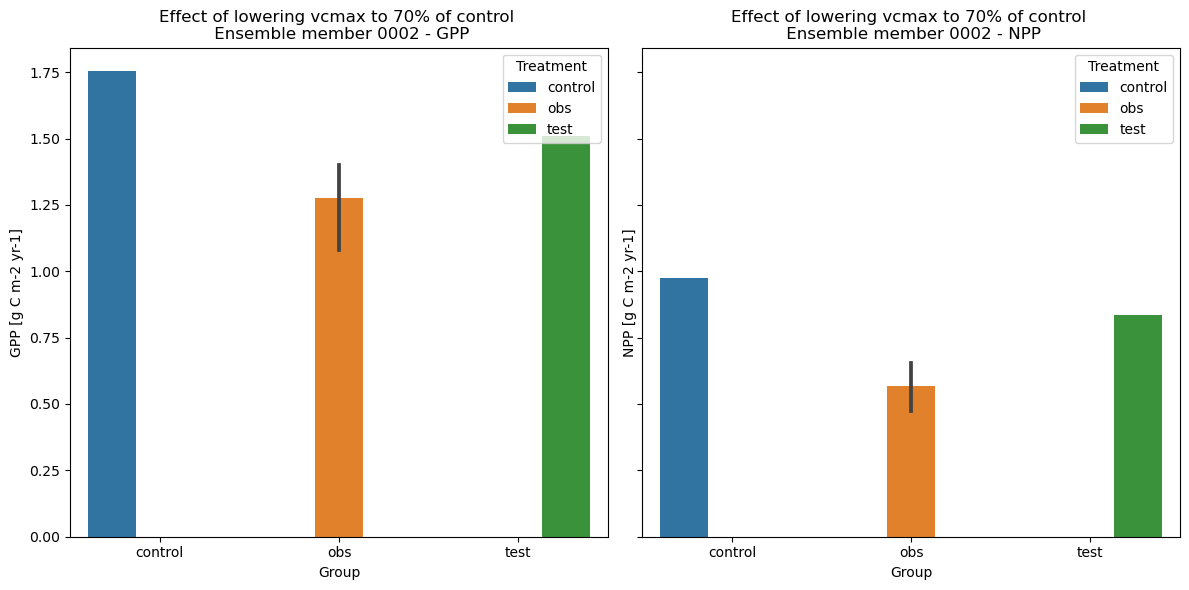

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data assumed to be in 'vcmax_test_data_0002'
# Ensure your DataFrame is loaded and named appropriately

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # 1 row, 2 columns, share y-axis

# First subplot for NPP
sns.barplot(x='Group', y='gpp', hue='Group', data=vcmax_test_data_0002, linewidth=2.5, ax=axs[0])
axs[0].set_title('Effect of lowering vcmax to 70% of control \n Ensemble member 0002 - GPP')
axs[0].set_xlabel('Group')
axs[0].set_ylabel('GPP [g C m-2 yr-1]')
axs[0].legend(title='Treatment')

# Second subplot for GPP
sns.barplot(x='Group', y='npp', hue='Group', data=vcmax_test_data_0002, linewidth=2.5, ax=axs[1])
axs[1].set_title('Effect of lowering vcmax to 70% of control \n Ensemble member 0002 - NPP')
axs[1].set_xlabel('Group')
axs[1].set_ylabel('NPP [g C m-2 yr-1]')
axs[1].legend(title='Treatment')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


/home/adamhb/miniconda3/envs/env4/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


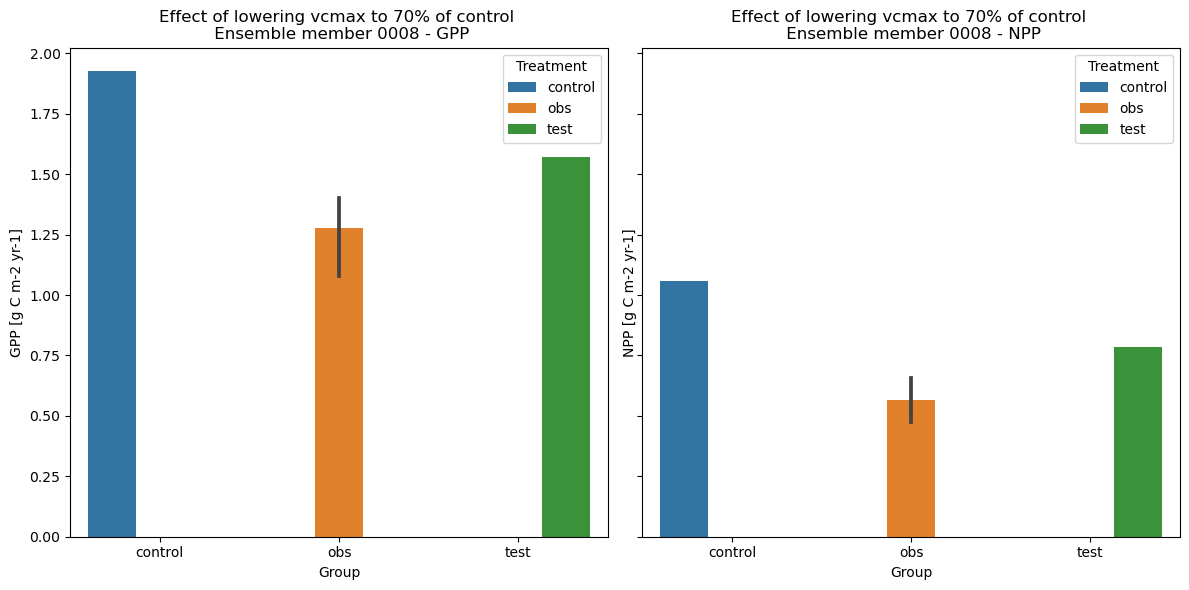

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data assumed to be in 'vcmax_test_data_0002'
# Ensure your DataFrame is loaded and named appropriately

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # 1 row, 2 columns, share y-axis

# First subplot for NPP
sns.barplot(x='Group', y='gpp', hue='Group', data=vcmax_test_data_0008, linewidth=2.5, ax=axs[0])
axs[0].set_title('Effect of lowering vcmax to 70% of control \n Ensemble member 0008 - GPP')
axs[0].set_xlabel('Group')
axs[0].set_ylabel('GPP [g C m-2 yr-1]')
axs[0].legend(title='Treatment')

# Second subplot for GPP
sns.barplot(x='Group', y='npp', hue='Group', data=vcmax_test_data_0008, linewidth=2.5, ax=axs[1])
axs[1].set_title('Effect of lowering vcmax to 70% of control \n Ensemble member 0008 - NPP')
axs[1].set_xlabel('Group')
axs[1].set_ylabel('NPP [g C m-2 yr-1]')
axs[1].legend(title='Treatment')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Lowering VCmax makes it a bit harder for the forest to grow up

Many of these instances of conifers dying out with lower vcmax values. But we could lower the lower boundaries of vcmax in the next lhs. Also, this might not be an issue. I can check with the last equilibrium ensemble to see if npp and gpp was low in any simulations.

In [18]:
f1869_scls_dist_low_vcmax = esm_tools.get_size_class_distribution(case_name='CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787',
                                      years = list(range(1869,1870)),
                                      model_output_root=output_root, tag_numbers=list(range(119,129)))

-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 


In [19]:
bug_fix_1869_scls_dist['Group'] = 'control'
f1869_scls_dist_low_vcmax['Group'] = 'test'
vcmax_scls_data = pd.concat([bug_fix_1869_scls_dist,f1869_scls_dist_low_vcmax],axis=0)

bins = [5, 20, 40, 60, 80, 100, 120, float('inf')]
labels = ['5-20', '20-40', '40-60', '60-80', '80-100', '100-120', '>120']

# Create a new column for binned size classes
vcmax_scls_data['new_size_class'] = pd.cut(vcmax_scls_data['size_class'], bins=bins, labels=labels, right=False, include_lowest=True)
vcmax_scls_data = vcmax_scls_data.groupby(['Group','inst_tag','new_size_class']).sum()['density'].reset_index()

In [20]:
vcmax_scls_data.groupby(['Group','new_size_class']).mean()['density']

Group    new_size_class
control  5-20              44.303043
         20-40             63.276878
         40-60             21.016333
         60-80             21.336658
         80-100            10.702981
         100-120            8.319721
         >120               0.000000
test     5-20              41.469208
         20-40             32.907932
         40-60             20.637877
         60-80             20.334618
         80-100             4.473853
         100-120            0.752781
         >120               0.000000
Name: density, dtype: float32

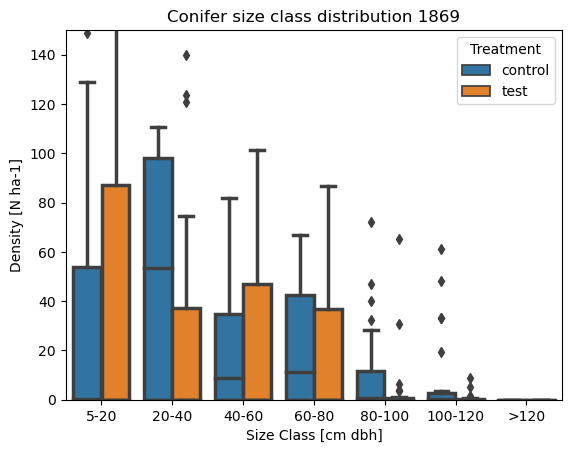

In [21]:
sns.boxplot(x='new_size_class', y='density', hue='Group', data=vcmax_scls_data , linewidth=2.5)

# Adding titles and labels
plt.title('Conifer size class distribution 1869')
plt.xlabel('Size Class [cm dbh]')
plt.ylabel('Density [N ha-1]')
plt.ylim(0, 150)

# Adding a legend if not automatically included
plt.legend(title='Treatment')

# Display the plot
plt.show()

## Checking on equilibrium

The members I checked did reach an equilbrium, but given that they both have high NPP, for the next round of simulations I want to run for 700 years to be sure.

In [22]:
import xarray as xr
import glob

def load_dataset(directory, pattern, concat_dim):
    """
    Load multiple netCDF files from a specified directory that match a given pattern into a single xarray dataset.

    Parameters:
        directory (str): Directory to search for files.
        pattern (str): Pattern to match files. Example: '*.nc' for all netCDF files.
        concat_dim (str): Dimension along which to concatenate the files (commonly 'time').

    Returns:
        xr.Dataset: Combined dataset from all matched files.
    """
    # Build the file path pattern
    file_pattern = f"{directory}/{pattern}"
    
    # List all files matching the pattern
    files = glob.glob(file_pattern)
    #print(files)
    
    # Check if any files were found
    if not files:
        raise FileNotFoundError(f"No files found for pattern {file_pattern}")
    
    # Load and concatenate the datasets
    dataset = xr.open_mfdataset(files)
    
    return dataset

## Equilibrium 0002

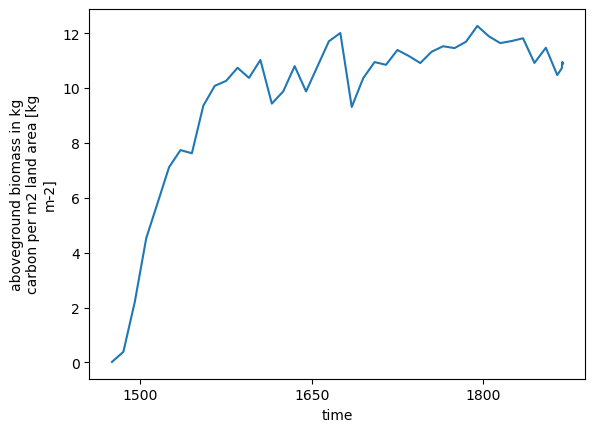

In [23]:
inst_0002_1475_1865 = load_dataset(os.path.join(output_root,'CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787/lnd/hist'),pattern="*0002*",concat_dim="time")
inst_0002_1475_1865['FATES_VEGC_ABOVEGROUND'].plot()
plt.show()

## Equilibrium 0008

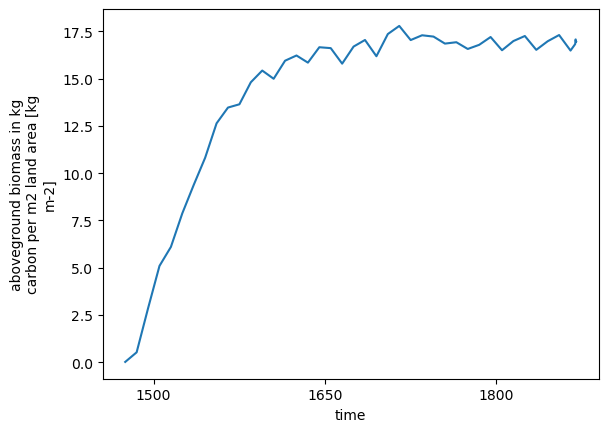

In [24]:
inst_0008_1475_1865 = load_dataset(os.path.join(output_root,'CZ2_equilibrium_040924_-17e2acb6a_FATES-1449c787/lnd/hist'),pattern="*0008*",concat_dim="time")
inst_0008_1475_1865['FATES_VEGC_ABOVEGROUND'].plot()

## Looking to see if more basal area is still shifting to larger size classes

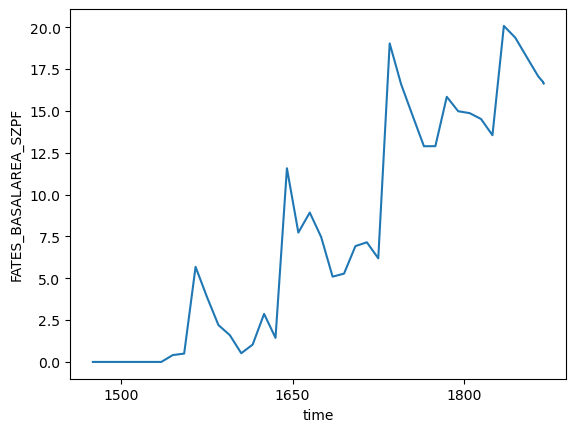

In [45]:
xarr = esm_tools.scpf_to_scls_by_pft(inst_0008_1475_1865['FATES_BASALAREA_SZPF'], inst_0008_1475_1865).\
       sel(fates_levpft = slice(0,3)).sum(dim = 'fates_levpft').sel(fates_levscls = slice(80,None)).sum(dim = "fates_levscls").\
       isel(lndgrid = 0) * m2_per_ha

xarr.plot(x = "time")
plt.show()

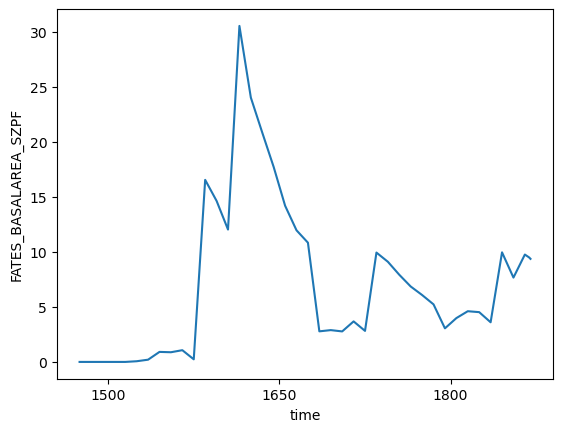

In [44]:
xarr = esm_tools.scpf_to_scls_by_pft(inst_0002_1475_1865['FATES_BASALAREA_SZPF'], inst_0002_1475_1865).\
       sel(fates_levpft = slice(0,3)).sum(dim = 'fates_levpft').sel(fates_levscls = slice(80,None)).sum(dim = "fates_levscls").\
       isel(lndgrid = 0) * m2_per_ha

xarr.plot(x = "time")
plt.show()